<a href="https://colab.research.google.com/github/sandeshrajbhandari/py-notebooks/blob/main/Open_Interpreter_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

modified from the open-interprter demo to use with open-router api models. testing with free models
> source : https://colab.research.google.com/drive/1WKmRXZgsErej2xUriKzxrEAXdxMSgWbb?usp=sharing

test for github.



# Welcome!

**Open Interpreter** is an open-source project that lets GPT-4 execute Python code locally — or in this case, in Google Colab.

In this demo notebook, we'll explore a few powerful use-cases for Open Interpreter:

1. Writing and editing dozens of documents based on some criteria.
2. Creating "slowed and reverbed" versions of songs with just a YouTube link.
3. Redrawing every frame in a music video with Stable Diffusion.

Now, grab a drink + an `OPENAI_API_KEY` and let's get started!




<br>

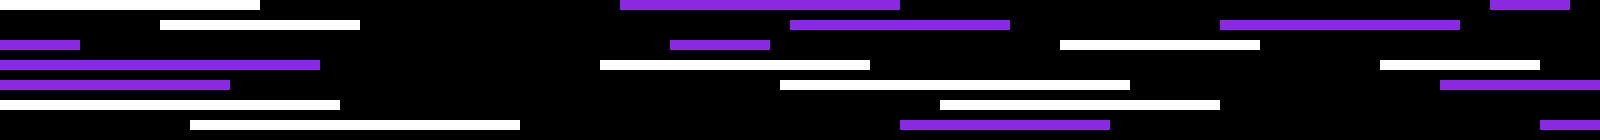

# Setup

First, let's install `open-interpreter`:

In [ ]:
!pip install open-interpreter
# Google Colab users: restart your runtime here.

Open Interpreter is best used with GPT-4. You can [grab an API key for it here](https://platform.openai.com/account/api-keys).

❗ **Remember to restart your runtime** (`Runtime` > `Restart`) before running the next cell, or you will get an error.

In [ ]:
!pip install opencv-python

In [ ]:
import cv2 # so that interpreter module works.
from google.colab import userdata
from interpreter import interpreter

interpreter.llm.api_base = "https://openrouter.ai/api/v1"
interpreter.llm.api_key = userdata.get('OPENROUTER_API_KEY')
# interpreter.llm.model = "openrouter/lynn/soliloquy-l3:free"
# interpreter.llm.model = "openrouter/nousresearch/nous-capybara-7b:free"
interpreter.llm.model = "openrouter/google/gemma-7b-it:free"
interpreter.llm.model = "openrouter/mistralai/mistral-7b-instruct:free"
#
print(interpreter.llm.api_base)
interpreter.verbose = False
interpreter.debug = False
interpreter.stream = True
interpreter.conversation_history = False
interpreter.reset()

https://openrouter.ai/api/v1


In [ ]:
interpreter.reset()

In [ ]:
interpreter.conversation_history = False

In [ ]:
# prompt: view the files in /root/.config/open-interpreter/conversations
!ls /root/.config/open-interpreter/conversations
!cat /root/.config/open-interpreter/conversations/Please_print_hello__April_30_2024_11-10-46.json


Hi__April_30_2024_11-37-38.json  Please_print_hello__April_30_2024_11-10-46.json
hi__April_30_2024_11-42-26.json
[{"role": "user", "type": "message", "content": "Please print hello world."}, {"role": "assistant", "type": "message", "content": " Here's my plan to print \"hello world\" on the user's machine:\n\n1. In Python, use the `computer.files.write` method to create a new file with a blank text.\n2. In the new file, use print` function to output the string \"hello world\".\n3. Save the file.\n4. In the shell, change directory to the directory where the file was created.\n5. In the shell, use the `cat` command to display the contents of the file.\n\nHere's the Python code to implement the plan"}, {"role": "assistant", "type": "code", "format": "python", "content": "thon\nimport computer\n\nwith open('/content/hello_world.txt', 'w') as f:\n    f.write(\"hello world\\n\")\ncomputer.files.edit('/content/hello_world.txt', \"hello world\", \"print(computer.files.edit('/content/hello_worl

**By default, Open Interpreter will ask for confirmation before executing any code.**

Since Google Colab is a safe, isolated environment, we recommend enabling `auto_run`. This mimics the behavior of OpenAI's code interpreter.

In [ ]:
interpreter.auto_run = False # no need to say yes to run code

# Basic Examples

## Hello, World!

Let's start by asking the interpreter to print hello world.

In [ ]:
interpreter.chat("Please print hello world. ")
# this worked with llama 3 70b but not mistral 7b instruct.

Open Interpreter will require approval before running code.

Use interpreter -y to bypass this.

Press CTRL-C to exit.

Output()

Output()

  Would you like to run this code? (y/n)

  y


Output()

[{'role': 'assistant', 'type': 'message', 'content': ' Sure!\n\n'},
 {'role': 'assistant',
  'type': 'code',
  'format': 'python',
  'content': '\nprint("Hello, World!")\n'},
 {'role': 'computer',
  'type': 'console',
  'format': 'output',
  'content': 'Hello, World!\n'}]

## test chat interactive

In [ ]:
interpreter.chat()
# this worked with llama 3 70b but not mistral 7b instruct.

Open Interpreter will require approval before running code.

Use interpreter -y to bypass this.

Press CTRL-C to exit.


> hey


Output()

> calculate the radius of earth


Output()

Output()

Output()

> write python code to do thta


Output()

Output()

  Would you like to run this code? (y/n)

  y


Output()

> what is your name


Output()

Please run 'pip install "unstructured[all-docs]"' to improve document-reading performance.


KeyboardInterrupt: Interrupted by user

In [ ]:
!interpreter --help

usage: interpreter [options]

Open Interpreter

options:
  -h, --help            show this help message and exit
  -p PROFILE, --profile PROFILE
                        name of profile. run `--profiles` to open profile directory
  -ci CUSTOM_INSTRUCTIONS, --custom_instructions CUSTOM_INSTRUCTIONS
                        custom instructions for the language model. will be appended to the
                        system_message
  -s SYSTEM_MESSAGE, --system_message SYSTEM_MESSAGE
                        (we don't recommend changing this) base prompt for the language model
  -y, --auto_run        automatically run generated code
  -v, --verbose         print detailed logs
  -m MODEL, --model MODEL
                        language model to use
  -t TEMPERATURE, --temperature TEMPERATURE
                        optional temperature setting for the language model
  -lsv, --llm_supports_vision, --no-llm_supports_vision
                        inform OI that your model supports vision, and can 

Great! The model decided to run a **code block** then tell us its output.

## Math

For this example, we're going to open an interactive chat in our terminal with `interpreter.chat()`.

💬 **The interactive chat behaves exactly like ChatGPT.** 💬

Try this:

1. Ask Open Interpreter to solve an equation like `10x + 14 = 12`
2. Watch it use a Python library called `sympy` to solve it.
3. Stop the cell to leave the interactive chat.

In [ ]:
interpreter.llm.model = "openrouter/huggingfaceh4/zephyr-7b-beta:free"
interpreter.chat("solve the equation using python code. 10x + 14 = 12")

Open Interpreter will require approval before running code.

Use interpreter -y to bypass this.

Press CTRL-C to exit.

We were unable to determine the context window of this model. Defaulting to 3000.

If your model can handle more, run interpreter.llm.context_window = {token limit}.

Also please set interpreter.llm.max_tokens = {max tokens per response}.

Continuing...

Output()

Output()

  Would you like to run this code? (y/n)

  y


Output()

Output()

[{'role': 'assistant',
  'type': 'message',
  'content': "\nTo solve the equation10x + 14 = 12 using Python, you can follow these steps:\n\n1. Assign the value of14 to a variableb`.\n2. Assign the value of12 to a variablec`.\n3. Dividec by10 to get the value ofx (since10x is on the left side of the equation).\n4. Store the result in a variablex`.\n\nHere's the Python code to solve the equation:\n\n"},
 {'role': 'assistant',
  'type': 'code',
  'format': 'python',
  'content': '\nb = 14\nc = 12\nx = (c - b) / 10\nprint("The value of x is:", x)\n'},
 {'role': 'computer',
  'type': 'console',
  'format': 'output',
  'content': 'The value of x is: -0.2\n'},
 {'role': 'assistant',
  'type': 'message',
  'content': "\n\nIn this case, the value of x is approximately -0.2, since we're rounding down to the nearest hundredth. However, since x is a decimal, it's not an exact solution to the equation. In order to find an exact solution, we would need to find a value of x that results in a whole nu

In [ ]:
interpreter.messages = [] # reset messages

In [ ]:
interpreter.chat()

## Web Browsing

Let's ask Open Interpreter to browse the web.

1. Start by opening an interactive chat again with `interpreter.chat()`.
2. Type a query like "what are the last 10 BBC news headlines?"

In [ ]:
interpreter.chat()

Type 'exit' to leave the chat.

> What are the last 10 BBC news headlines?


Output()

Output()

Output()

Output()

Output()

Output()

> exit


Here it likely ran two code blocks:

1. The first code block installed `feedparser` from pip.
1. The second used `feedparser` to read the BBC's RSS feed.

Notice that the first code block **was a shell command.** Open Interpreter uses Jupyter internally, so it can run shell commands *and* Python.

## Resetting the Chat

In Python, the Open Interpreter instance remembers your conversation history.

If you want it to forget previous messages, you can reset it:

In [ ]:
interpreter.messages = []

In [ ]:
interpreter.messages = []

Now it won't remember the previous examples.

<br>

`Why might I want to do this?`

<br>

To reduce the number of tokens that get sent to OpenAI.

We need to send OpenAI your entire conversation history (automatically limited to the maximum amount GPT-4 can handle) everytime 1) we send it a message or 2) a code block produces an output.

<br>

**Note:** The command-line version of Open Interpreter resets itself automatically.

# Advanced Examples

## YouTube Link -> Animation

In [ ]:
# Watch the final output:

I've always been fascinated by hand drawn animation. Let's see if we can use Open Interpreter to express that.

We'll ask it to redraw every frame in Steve Lacey's "Bad Habit" video with `replicate`. They have a service that can redraw images in new styles.

<br>

`Doesn't this require logging into "replicate"?`

<br>

Yes, and this is a great reason to use Open Interpreter! We can simply log in to `replicate`, then tell the interpreter how to use it ([I just pasted in replicate's quick start](https://replicate.com/jagilley/controlnet-pose/api)).
Because code is run locally, the interpreter is "logged in" too.

In [ ]:
# First, let's install Replicate and log in.

!pip install replicate
import os
os.environ["REPLICATE_API_TOKEN"] = "api_token" # Get yours: https://replicate.com/account

In [ ]:
# Now we'll ask interpreter to redraw the video using Replicate.

message = """

I want to edit a video so it's in 12 fps and each frame is redrawn with ControlNet
to give it a stop motion / hand-drawn animation feeling.

Here's how you use ControlNet on a single frame, from Replicate's quick start:

import replicate
output = replicate.run(
    "jagilley/controlnet-canny:aff48af9c68d162388d230a2ab003f68d2638d88307bdaf1c2f1ac95079c9613",
    input={"image": open("path/to/file", "rb"), "prompt": "<prompt>"}
)

(I've noticed that this always returns a list of two links. Just use the second one.)

Please download this video and just use the seconds from 0:10 to 0:17:
https://www.youtube.com/watch?v=VF-FGf_ZZiI

Then reduce it to 12fps, and then replace those frames with ControlNet redraws
using random prompts that evoke stop motion / hand-drawn animation--
think embroidery, pencil art, claymation, yarn on a table, etc--
then add the original sound back.

Thanks!

"""

interpreter.messages = [] # Reset the chat
interpreter.chat(message) # Pass in the message above

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

<br>

Just for fun, imagine a function that takes a `youtube_url`, passes it into `interpreter.chat(message)` with the instructions above, then returns the processed filename:

```python
def animate_video(youtube_url):
  interpreter.messages = []
  interpreter.message(f'Animate {youtube_url} with the following steps then save to final.mp4. ...')
  return 'final.mp4'
```

## Create documents

In [ ]:
interpreter.messages = [] # Reset the chat
interpreter.chat("""Can you make a folder called documents and put five .docx files in it
and write a sentence about machine learning in each of them?""") # Pass a message directly into chat

Output()

Output()

Output()

Output()

Output()

Output()

Output()

## Edit all documents in a folder

In [ ]:
interpreter.messages = []
interpreter.chat("""Go through all the .docx files in my 'documents' folder
and replace every occurrence of 'Machine Learning' with 'AI'.""")

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [ ]:
# If you don't run interpreter.messages = [], it will remember your conversation.
interpreter.chat("I wanted to replace the files, so please delete the old ones and rename the new ones")

Output()

Output()

Output()

## Slow + Reverb a YouTube Link

In [ ]:
message = "Can you slow + reverb this song? https://www.youtube.com/watch?v=8GW6sLrK40k"

interpreter.messages = []
interpreter.chat(message)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [ ]:
# Listen to the final result:

Now we could open `interpreter.chat()`, ask it to slow it down more, add more reverb, or even create a video with [a .gif backround](https://i.giphy.com/media/zIV7iWK9f0x8Y/giphy.webp).

## Open Interpreter Artwork

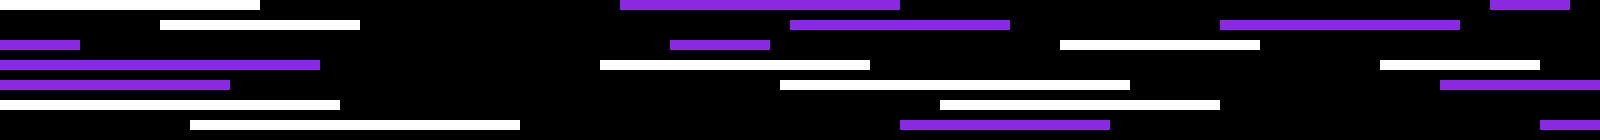

The artwork for Open Interpreter was illustrated by Open Interpreter. How?

It was given a description inspired by [Ruby Chen's](https://rubywjchen.com/) GPT-4 artwork:

In [ ]:
message = """

Hello! I'd like your help making some artwork for the Open Interpreter project.

It's going to be pixel art, ~160 wide and 14 pixels tall. Black background.

I'd like to see rectangles on every other row. These should be anywhere from
~6 to 36 pixels in width. They should be placed randomly around the image, never touching eachother
(the space between them should be ~16-64 pixels). They can go off screen / butt up against the edges.

Half of these rectangles should be white, half should be a powerful purple color: R138 G43 B226

Once you've created it, please scale it up with nearest-neighbor 10x.

Please make ~10 options I can review, like banner_1.png, banner_2.png, etc.

"""

interpreter.messages = []
interpreter.chat(message)

Output()

Output()

## Add subtitles to videos

`replicate` also has a speech-to-text service that generates subtitle files (.srt).

Let's ask Open Interpreter to use some code [copied from replicate's quickstart](https://replicate.com/m1guelpf/whisper-subtitles/api) to add hardcoded subtitles to a video:

In [ ]:
message = """
Hello! I just logged into Replicate on this machine. You have my permission to run any code.

Could you use their speech-to-text service to hardcode subtitles to the bottom of billyking.mp4 and make billy_subbed.mp4?
"""

# Again, let's give Open Interpreter an example of how to use the service.
message += """
Here's some code that Replicate provides for how to use their service:

import replicate
output = replicate.run(
    "m1guelpf/whisper-subtitles:7f686e243a96c7f6f0f481bcef24d688a1369ed3983cea348d1f43b879615766",
    input={"audio_path": open("path/to/file", "rb")} # Can also be a video path
)
print(output)

"""

# Now let's reset and run Open Interpreter.
interpreter.messages = []
interpreter.chat(message)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

You can [watch the output video here.](https://youtube.com/shorts/F6gOzP691po?feature=share)

## YouTube video -> TikTok Clip

In [ ]:
message = """

I'd like your help in making a TikTok clip of this: https://www.youtube.com/watch?v=KgHkAwaW_lk

Please cut the clip from this -- from 0:15 to 0:38 -- and crop it to portrait (exactly 9:16-- this will be tricky)
around the face in the frame. Just follow the face horizontally -- the final video should be as tall as the original.

You'll need to smoothly/softly follow the one face in the frame so please smoothly average out the motion
between confident face detections. Then put the audio back in. Thanks!

"""

interpreter.messages = []
interpreter.chat(message)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

  warnings.warn("Warning: in file %s, "%(self.filename)+



Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Nice! It's saved as `cropped_clip_with_audio.mkv`.

One problem -- if we want to send it to our phone and upload it to TikTok or YT Shorts, we'll need it to be an `.mp4` file.

So, let's just ask for that:

In [ ]:
# The interpreter remembers our conversation unless we explicitly .reset() it.
interpreter.chat("Looks great! Can you convert it to an mp4?")

Output()

Output()

Output()

Amazing. Now we can display the final result in Google Colab, too:

In [ ]:
# Final output:

## Bonus: Image -> Animation

Another `replicate` example -- let's use ControlNet to turn [this image](https://i.ibb.co/f0p4Q5R/i-heart-victoria-paris.png) into 90s-style animated intro.

In [ ]:
message = """
Hi, I want to make a video that's comprised of 12 frames. The 12 frames should be of the image
victoria.png run through controlnet with different materials as prompts.

I'm logged into replicate on this machine. Here's how to use replicate's controlnet:

output = replicate.run(
    "jagilley/controlnet-canny:aff48af9c68d162388d230a2ab003f68d2638d88307bdaf1c2f1ac95079c9613",
    input={"image": open("path/to/file", "rb"), "prompt": "metal"}
)
print(output)

Can you run victoria.png through this 12 times with different materials each time like "metal", "embroidery", and "crayon"?
Then stitch together the 12 pictures into a 1 second video clip. Thank you!
"""

interpreter.messages = []
interpreter.chat(message)

Output()

Output()

['metal', 'embroidery', 'crayon']

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

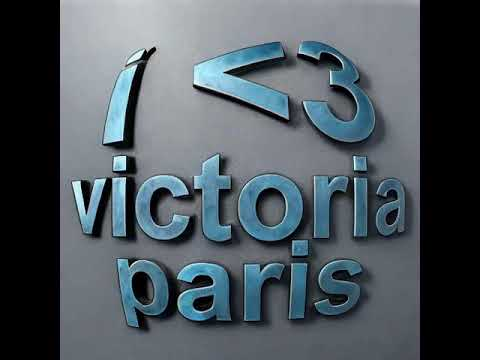

In [ ]:
# Watch the final output: